# Klasifikacija/Classification

# Šta je klasifikacija
---
Klasifikacija je postupak određivanja / predviđanja klase datih tačaka podataka korišćenjem postojećeg označavanja tačaka. Spada pod kategoriju nadziranog učenja u kojoj model uči iz zadatih tačaka podataka, a zatim koristi ovo učenje za klasifikaciju novih zapažanja, a ti podaci mogu biti dvoklasni (neželjena ili neželjena pošta) ili višerazredni (ocena A, ocena B, razred C ili razred D). Problem klasifikacije je kada je izlazna promenljiva kategorija, kao što je „zelena“ ili „crvena“ i „neželjena pošta“ ili „nije neželjena pošta“.
Postoje razne primene u klasifikaciji u mnogim domenima kao što su medicinska dijagnostika, sistem ocenjivanja, predikacija ocena, itd.
Postoji više načina pomoću kojih možemo postići klasifikaciju podataka sa dole datim algoritmima, a to su najpoznatiji poput:
1. Linear Classifier.
2. Neural Networks.
3. Support Vector Machines.
4. Decision Trees 
---
  Sam dataset koji je koriscen u izradi sadrzi 2 foldera sa slikama razlicitih pasa. Folder "train" sadrzi 10,222 slike, folder "test" sadrzi 10,357.
Zatim se nalaze 2 csv fajla, "labels" i "sample_submissions". Fajl labels sadrzi definisane slike (id slike = naziv slike) i rasu pasa kojoj taj pas sa slike pripada. Drugi fajl, sample_submissions, jeste fajl koji predstavlja zeljeni izgled kranjeg izlaza programa kroz generisani primer.

# TensorFlow
---
Mašinsko učenje je složena disciplina. Ali primena modela mašinskog učenja je daleko manje zastrašujuća i teška nego nekada, zahvaljujući okvirima za mašinsko učenje - kao što je Google-ov TensorFlow - koji olakšavaju proces prikupljanja podataka, modela obuke, služenja predviđanja i preciziranja budućih rezultata.

Kreirao ga je **Google Brain** tim, TensorFlow je biblioteka otvorenog koda za numeričko računanje i veliko mašinsko učenje. TensorFlow spaja mnoštvo modela i algoritama mašinskog učenja i dubokog učenja (tzv. Neuronsko umrežavanje) i čini ih korisnim putem uobičajene metafore. Koristi Python za pružanje pogodnog front-end API-ja za izgradnju aplikacija sa okvirom, dok izvršava te aplikacije u C ++ visokih performansi.

**TensorFlow** može da obučava i pokreće duboke neuronske mreže za ručno klasifikovanu cifru, prepoznavanje slika, ugradnju reči, rekurentne neuronske mreže, modele sekvence u sekvence za mašinsko prevođenje, obradu prirodnog jezika i simulacije zasnovane na PDE (jednačina diferencijalne diferencijalne diferencijale). Najbolje od svega je što TensorFlow podržava predviđanje proizvodnje u velikom obimu, sa istim modelima koji se koriste za obuku.

**Kako funkcionise TensorFlow**
TensorFlow omogućava programerima da kreiraju grafikone toka podataka - strukture koje opisuju kako se podaci kreću kroz grafikon ili niz čvorova za obradu. Svaki čvor na grafikonu predstavlja matematičku operaciju, a svaka veza ili ivica između čvorova je višedimenzionalni niz podataka ili tenzor.

TensorFlow nudi sve ovo za programera putem jezika Python. Pithon je jednostavan za učenje i rad sa njim i pruža pogodne načine da se izrazi kako apstrakcije na visokom nivou mogu biti povezane. Čvorovi i tenzori u TensorFlov su Pithon objekti, a TensorFlow aplikacije su same Pithon aplikacije.

Stvarne matematičke operacije se, međutim, ne izvode u Pythonu. Biblioteke transformacija koje su dostupne putem TensorFlow-a napisane su kao C ++ binarne datoteke visokih performansi. Pithon samo usmerava saobraćaj između delova i pruža apstrakcije programiranja na visokom nivou kako bi ih povezao.

Aplikacije TensorFlow mogu se pokretati na većini bilo kojih pogodnih ciljeva: lokalnoj mašini, klasteru u oblaku, iOS i Android uređajima, CPU-ima ili GPU-ima. Ako koristite Google-ov sopstveni oblak, možete da pokrenete TensorFlow na Google-ovom prilagođenom silicijumu TensorFlow Processing Unit (TPU) za dalje ubrzanje. Dobijeni modeli koje je kreirao TensorFlow, međutim, mogu se primeniti na većini bilo kojih uređaja na kojima će služiti za predviđanje.


# Importi
---
Definisanje neophodnih biblioteka za dalji rad

In [7]:
!gdown --fuzzy https://drive.google.com/file/d/16_SPk4CIhL5tL9e3LVnzdyUT_UIwKWDl/view


Downloading...
From: https://drive.google.com/uc?id=16_SPk4CIhL5tL9e3LVnzdyUT_UIwKWDl
To: /content/#6.zip
100% 724M/724M [00:15<00:00, 47.1MB/s]


Unzip dataseta

In [8]:
!unzip "/content/#6.zip" -d "/content/unzipped"

Streaming output truncated to the last 5000 lines.
  inflating: /content/unzipped/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/unzipped/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/unzipped/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/unzipped/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/unzipped/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/unzipped/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/unzipped/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/unzipped/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/unzipped/train/83fad0718581a696132c96c166472627.jpg  
  inflating: /content/unzipped/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: /content/unzipped/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: /content/unzipped/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: /content/unzipped/train/

In [9]:
import numpy as np 
import pandas as pd 
import os, cv2, random, time, shutil, csv
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gc
from tqdm import tqdm
from google.colab.patches import cv2_imshow


import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, Lambda, Dropout, InputLayer, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img

Definicija funkcije koja broji sve fajlove u folderu

In [10]:
def get_num_files(path):
    if not os.path.exists(path):
        return 0
    return sum([len(files) for r, d, files in os.walk(path)])

Učitavanje direktorijuma sa podacima

In [11]:
train_dir = '/content/unzipped/train'
test_dir = '/content/unzipped/test'

data_size = get_num_files(train_dir)
test_size = get_num_files(test_dir)
print('Data samples size: ', data_size)
print('Test samples size: ', test_size)

Data samples size:  10222
Test samples size:  10357


In [12]:

labels_dataframe = pd.read_csv('/content/unzipped/labels.csv')

sample_df = pd.read_csv('/content/unzipped/sample_submission.csv')

labels_dataframe.head(10)

id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound

# Prikaz jedne fotografije iz dataseta

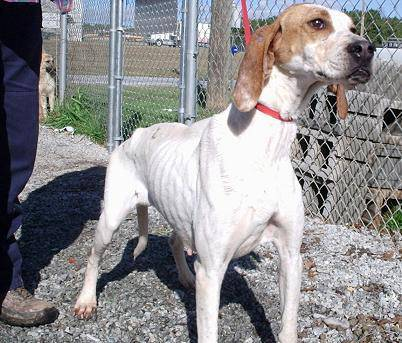

In [13]:

path = "/content/unzipped/train/0067dc3eab0b3c3ef0439477624d85d6.jpg"
img = cv2.imread(path)
cv2_imshow(img)


# Čitanje jedinstvenih rasa i dijagramski prikaz zastupljenosti

In [14]:
unique_breeds = labels_dataframe["breed"].value_counts()
print(unique_breeds)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64


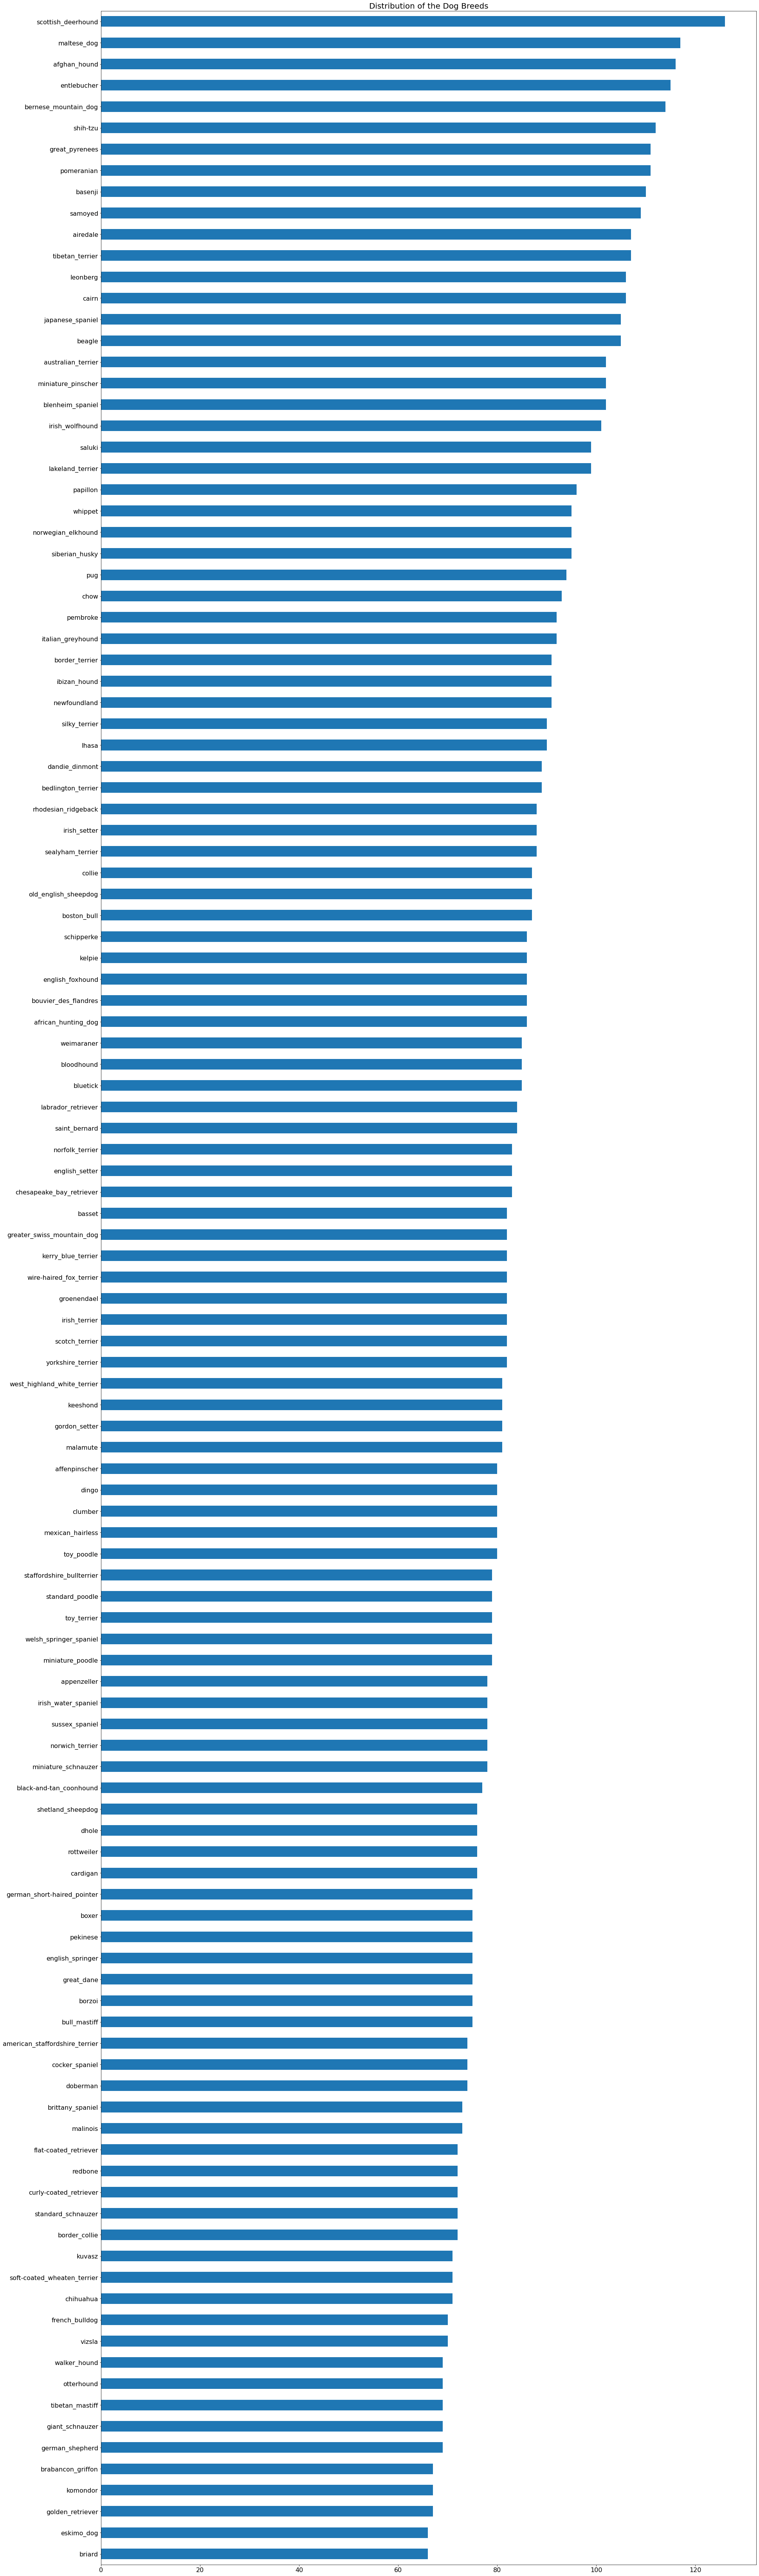

In [15]:
bar = labels_dataframe["breed"].value_counts(ascending=True).plot.barh(figsize = (30,120))
plt.title("Distribution of the Dog Breeds", fontsize = 20)
bar.tick_params(labelsize=16)
plt.show()

# Sortiranje liste sa rasama i prikaz prvih 10

In [16]:
dog_breeds = sorted(list(set(labels_dataframe['breed'])))
n_classes = len(dog_breeds)
print(n_classes)
dog_breeds[:10]

120


['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle']

# Definicija rečnika pojmova

In [17]:
class_to_num = dict(zip(dog_breeds, range(n_classes)))

# Definicija funkcije i smeštanje slika u niz
---
Inicijalizacija X i Y "niza" na to da x predstavlja broj slika i prikazuje njihovu rezoluciju (3d matricu piksela) i y niza koji predstavlja broj slika kao i broj različitih label-a (različitih rasa).

In [18]:
def images_to_array(data_dir, labels_dataframe, img_size = (224,224,3)):

    images_names = labels_dataframe['id']
    images_labels = labels_dataframe['breed']
    data_size = len(images_names)
    #initailize output arrays.
    X = np.zeros([data_size, img_size[0], img_size[1], img_size[2]], dtype=np.uint8)
    y = np.zeros([data_size,1], dtype=np.uint8)
    #read data and labels.
    for i in tqdm(range(data_size)):
        image_name = images_names[i]
        img_dir = os.path.join(data_dir, image_name+'.jpg')
        img_pixels = load_img(img_dir, target_size=img_size)
        X[i] = img_pixels
        
        image_breed = images_labels[i]
        y[i] = class_to_num[image_breed]
    
    
    y = to_categorical(y)
    #shuffle    
    ind = np.random.permutation(data_size)
    X = X[ind]
    y = y[ind]
    print('Ouptut Data Size: ', X.shape)
    print('Ouptut Label Size: ', y.shape)
    return X, y
    gc.collect()

# Definicija rezolucije fotografija
---
Ovaj korak je potreban kako ne bi postojale slike na ulazu koje su različitih rezolucija. Takođe, zbog ograničenja RAM memorije je, potrebno je smanjiti ukupnu rezoluciju fotografija kako bi model mogao uspešno da se kreira.

In [19]:
img_size = (250,250,3)
X, y = images_to_array(train_dir, labels_dataframe, img_size)

100%|██████████| 10222/10222 [00:29<00:00, 344.61it/s]


Ouptut Data Size:  (10222, 250, 250, 3)
Ouptut Label Size:  (10222, 120)


# Definicija get_features funkcije
---
Kreira se Lambda sloj i uvodi se GlobalAveragePooling2D() za filtriranje mape feature-a. Vrši se izdvajanje feature i unos se priprema za konvolucijsku neuronsku mrežu (CNN).

In [20]:
def get_features(model_name, data_preprocessor, input_size, data):

    #Prepare pipeline.
    input_layer = Input(input_size)
    preprocessor = Lambda(data_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    #Extract feature.
    feature_maps = feature_extractor.predict(data, batch_size=64, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps
    gc.collect()

# CNN - InceptionV3
---
Inception-v3 je revolucionarna arhitektura neuronske mreže iz porodice Inception koja čini nekoliko poboljšanja, uključujući korišćenje "glancanja" labela, faktorizovane konzole 7 x 7 i upotrebu pomoćnog klasifikatora za širenje informacija o labelama niže po mreži (zajedno sa upotrebom batch-a) normalizacija za slojeve u sidehead-u)
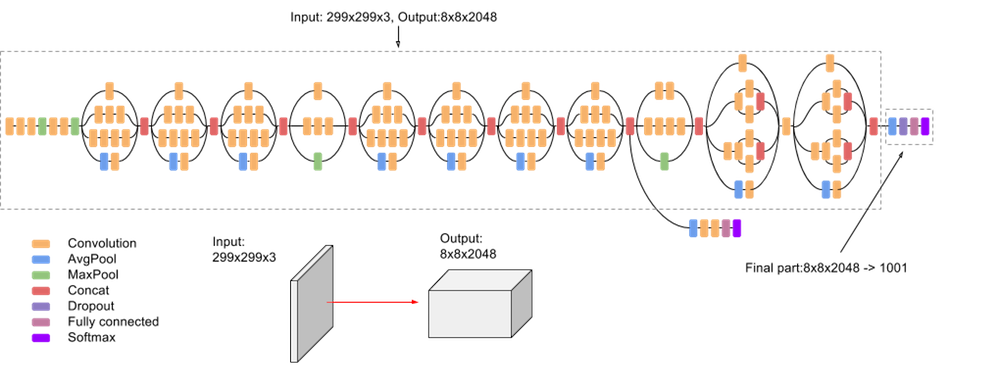

# InceptionV3 
---
Literatura:
1.   Keras: https://keras.io/api/applications/inceptionv3/
2.   Papers with code: https://paperswithcode.com/method/inception-v3
3.   Advanced guide to Inception: https://cloud.google.com/tpu/docs/inception-v3-advanced - Ovaj članak sam koristio za detaljnije razumevanje funkcionalnosti.



In [21]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)

160/160 [==============================] - 36s 144ms/step
Feature maps shape:  (10222, 2048)


In [22]:
final_features = inception_features
print('Final feature maps shape', final_features.shape)

Final feature maps shape (10222, 2048)


# Uvođenje EarlyStopping callback-a
---
EarlyStopping nam omogućava da njegovim pozivom pratimo određenu vrednost, u ovom slučaju 'val_loss', i da izazove prekid u epohama treniranja u slučaju da vrednosti u procesu krenu da opadaju (preciznost pogotka). Uz parametar restore_best_weights, vratiće se na najbolji mogući scenario treninga podataka, odnosno na trenutak pre pocetka opadanja vrednosti.

In [23]:
from keras.callbacks import EarlyStopping
#Prepare call backs
EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
my_callback=[EarlyStop_callback]

# Priprema DNN modela
---
Uvodimo sekvencijalni oblik "Dense" neuronske mreze.

---
Ime sugeriše da su slojevi u potpunosti povezani (gusti) od strane neurona u mrežnom sloju. Svaki neuron u sloju prima ulaz od svih neurona prisutnih u prethodnom sloju - dakle, oni su gusto povezani.
Drugim rečima, gusti sloj je potpuno povezan sloj, što znači da su svi neuroni u sloju povezani sa onima u sledećem sloju.[2]
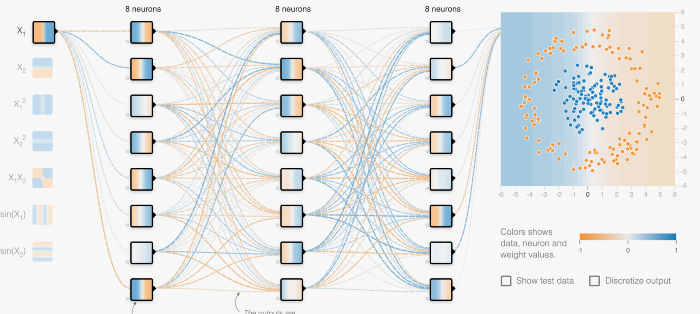


# Algoritam za optimizaciju Adam
---
Adamov algoritam za optimizaciju je proširenje stohastičkog gradijentnog spuštanja koje je nedavno zabeleženo u široj primeni aplikacija za duboko učenje u računarskom vidu i obradi prirodnog jezika. 
--- 
Stopa učenja se održava za svaku mrežnu težinu (parametar) i odvojeno prilagođava kako se učenje odvija.

Metoda izračunava individualne adaptivne stope učenja za različite parametre iz procena prvog i drugog momenta gradijenata.

Prilagodljivi algoritam gradijenta (AdaGrad) koji održava brzinu učenja po parametru koja poboljšava performanse kod problema sa retkim gradijentima (npr. Problema sa prirodnim jezikom i računarskim vidom).
Razmnožavanje korena srednjeg kvadrata (RMSProp) koji takođe održava stope učenja po parametru koje su prilagođene na osnovu proseka nedavnih veličina gradijenata za težinu (npr. Koliko se brzo menja). To znači da algoritam dobro radi kod mrežnih i nestacionarnih problema (npr. Bučnih).
Adam shvata prednosti i AdaGrada i RMSPropa.

Umesto da prilagođava stope učenja parametara na osnovu prosečnog prvog trenutka (srednje vrednosti) kao u RMSProp-u, Adam takođe koristi prosek drugih trenutaka gradijenata (necentrovana varijansa).

Konkretno, algoritam izračunava eksponencijalni pokretni prosek gradijenta i kvadratnog gradijenta, a parametri beta1 i beta2 kontrolišu stope propadanja ovih pokretnih proseka.

Početna vrednost pokretnih proseka i vrednosti beta1 i beta2 blizu 1,0 (preporučeno) rezultiraju pristrasnošću procene trenutka prema nuli. Ova pristrasnost se prevazilazi tako što se prvo izračuna pristrasne procene, a zatim izračunavaju procene ispravljene pristrasnošću.[3]
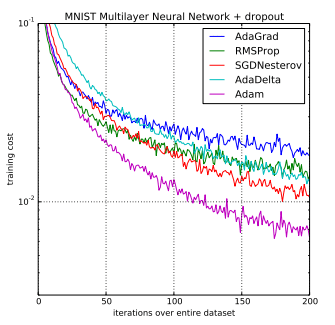

# Dense neural network i Adam
---
1. Heartbeat - https://heartbeat.fritz.ai/classification-with-tensorflow-and-dense-neural-networks-8299327a818a
2. Nepreciznosti Linearne klasifikacije - https://medium.com/mindorks/classification-problems-with-tensorflow-27eab36aa037
---
1. Adam - https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/


# Trening podataka
---
optimizer - algoritam za optimizaciju,
loss - pracenje gubitka tačnosti,
metrics - računamo tačnost [ accuracy= (True Positive + True Negative) / Total ] 

# Best case
---
Najveca preciznost izmerena je u 14. epohi i iznosi: 0.8954.
Uz pomoć definisanog EarlyDropout callback-a, nas algoritam je sam razumeo da nije bilo potrebno ići dalje iako je definisano 60 epoha.

In [24]:
gc.collect()
#Prepare DNN model
dnn = keras.models.Sequential([
    InputLayer(final_features.shape[1:]),
    Dropout(0.7),
    Dense(n_classes, activation='softmax')
])

dnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train simple DNN on extracted features.
h = dnn.fit(final_features, y,
            batch_size=128,
            epochs=60,
            validation_split=0.1,
            callbacks=EarlyStop_callback)
gc.collect()

Epoch 1/60
72/72 [==============================] - 1s 6ms/step - loss: 2.5784 - accuracy: 0.4382 - val_loss: 0.6261 - val_accuracy: 0.8231
Epoch 2/60
72/72 [==============================] - 0s 4ms/step - loss: 0.8255 - accuracy: 0.7665 - val_loss: 0.5038 - val_accuracy: 0.8426
Epoch 3/60
72/72 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.8032 - val_loss: 0.4676 - val_accuracy: 0.8514
Epoch 4/60
72/72 [==============================] - 0s 4ms/step - loss: 0.5660 - accuracy: 0.8253 - val_loss: 0.4572 - val_accuracy: 0.8446
Epoch 5/60
72/72 [==============================] - 0s 4ms/step - loss: 0.5178 - accuracy: 0.8394 - val_loss: 0.4664 - val_accuracy: 0.8485
Epoch 6/60
72/72 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.8512 - val_loss: 0.4589 - val_accuracy: 0.8456
Epoch 7/60
72/72 [==============================] - 0s 4ms/step - loss: 0.4335 - accuracy: 0.8631 - val_loss: 0.4686 - val_accuracy: 0.8553
Epoch 8/60
72/72 [==

1425

# Prikaz tačnosti istreniranog modela

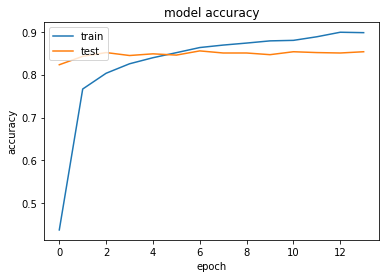

2716

In [25]:
keras.backend.clear_session()
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
gc.collect()

# Definisemo drugu funkciju za testiranje podataka i ponvaljamo ubacivanje slika u niz
---


In [26]:
gc.collect()
def images_to_array2(data_dir, labels_dataframe, img_size = (224,224,3)):

    images_names = labels_dataframe['id']
    data_size = len(images_names)
    X = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)
    
    for i in tqdm(range(data_size)):
        image_name = images_names[i]
        img_dir = os.path.join(data_dir, image_name+'.jpg')
        img_pixels = tf.keras.preprocessing.image.load_img(img_dir, target_size=img_size)
        X[i] = img_pixels
        
    print('Ouptut Data Size: ', X.shape)
    return X

test_data = images_to_array2(test_dir, sample_df, img_size)

100%|██████████| 10357/10357 [00:31<00:00, 323.88it/s]

Ouptut Data Size:  (10357, 250, 250, 3)


In [27]:
#Extract test data features.
inception_features = get_features(InceptionV3, inception_preprocessor, img_size, test_data)

test_features = inception_features
print('Final feature maps shape', test_features.shape)

162/162 [==============================] - 25s 151ms/step
Feature maps shape:  (10357, 2048)
Final feature maps shape (10357, 2048)


In [28]:
y_pred = dnn.predict(test_features, batch_size=128)

# Pisanje rezultata predikcije u novi csv fajl

In [29]:
for b in dog_breeds:
    sample_df[b] = y_pred[:,class_to_num[b]]
sample_df.to_csv('/content/submission_predictions.csv', index=None)

# Zaključak
---
Izrada projekta je bila interesantna. Kroz projekat sam stekao uvid koliko je oblast dubokog učenja široka, kao i koliko različitih primena je moguće pronaći za nju u svakodnevnom životu.